In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randrange
from numpy.linalg import eig
import warnings
import pandas as pd

## Generate Data

In [3]:
def generate_data(size, variance):
    Xdata = []
    for j in range(size):
        #Declare the array of values
        X = [0] * 30
        #Value of X1
        X[0] = np.random.normal(0, 1)
        #Value of X2
        X[1] = X[0] + np.random.normal(0, variance)
        #Value of X3
        X[2] = X[0] + np.random.normal(0, variance)
        for i in range(30):
            if i <= 2:
                continue
            else:
                #Every value after X1-3 is X[i-3] + the random normal
                X[i] = X[i-3] + np.random.normal(0, variance)
        Xdata.append(X)
    return Xdata

In [4]:
X = generate_data(5000,0.1)
X = np.array(X)

## Problem 1

In [341]:
def auto_encoder(size,variance,k,X1):
    
    #Declaring random weights to start with
    #Each of the random weights is made the same way as the 
    weights = [0] * 30
    weights[0] = np.random.normal(0, 1)
    weights[1] = weights[0] + np.random.normal(0, variance)
    weights[2] = weights[0] + np.random.normal(0, variance)
    for i in range(30):
        if i <= 2:
            continue
        else:
            weights[i] = weights[i-3] + np.random.normal(0, variance)
    
    #Perform action k times, to be altered
    for i in range(k):
        z = np.dot(X1,weights)
        sig1 = np.exp(z)
        sig2 = np.exp(-z)
        tanh = (sig1 - sig2)/(sig1 + sig2)
        err = (z - tanh)
        tanWeight = 1 - (tanh ** 2)
        adjust = err*tanWeight
        adjust[np.isnan(adjust)] = 0
        weights += np.matmul(X1T,adjust)
    
    TotalError = sum(sum(abs((X1 - (X1*weights)))**2))/size
    
    return(TotalError)

0 : 98.4323974939011
1 : 5.327546227303761
2 : 212.834425574061
3 : 312.73898110703004
4 : 472.16530893570837
5 : 35.524273054868225
6 : 976.8317850240729
7 : 127.47805506194199
8 : 608.1589571471243
9 : 238.8915830436437
10 : 589.6689265855618
11 : 790.1741006577289
12 : 186.4629194684945
13 : 19.72886108321289
14 : 449.482959478331
15 : 682.0606131792443
16 : 1134.301148889813
17 : 1491.5372881325052
18 : 280.1474364856479
19 : 164.61041910820742
20 : 1779.566844324551
21 : 4422.241840278942
22 : 409.94155194091655
23 : 8902.96799889005
24 : 1276.1464987805518
25 : 1275.2621497946654
26 : 6699.438761741011
27 : 242.1731969105549
28 : 5506.040837970944
29 : 361.2742177862204


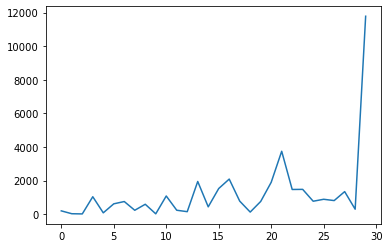

In [372]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

X1 = generate_data(5000,0.1)
X1 = np.array(X1)
ks = []
#On the same dataset, find the error depending on the value of k
for k in range(30):
    ks.append(auto_encoder(5000,0.1,k,X1))
    print(k,":", auto_encoder(5000,0.1,k,X1) )
plt.plot(ks)

0.0 29.14438866209997
0.1 156.6543208395522
0.2 44.446669339747864
0.3 279.30434461890974
0.4 19.163881452608656
0.5 856.9629874872
0.6 1285.2486679753235
0.7 923.925672666647
0.8 1918.8837369105086
0.9 2800.1073649634054
1.0 2655.7349846562656
1.1 1668.2256782951138
1.2 2810.485623923772
1.3 1364.3963705692777
1.4 1912.7064994107675
1.5 11775.704904956116
1.6 4749.402694389535
1.7 9192.94494937125
1.8 16872.32240943811
1.9 11575.088075320591
2.0 34838.88662983752


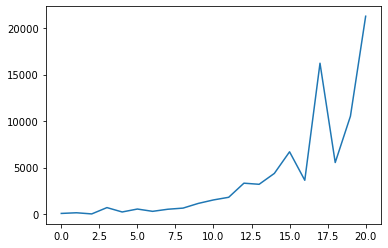

In [409]:
warnings.filterwarnings("ignore", category=RuntimeWarning) 
sds = []
#Perform all the above actions, but with different data each time. sd from 0.1 to 2.0
for sd in range(21):
    X1 = generate_data(5000,sd*0.1)
    X1 = np.array(X1)
    sds.append(auto_encoder(5000,sd*0.1,1,X1))
    print(sd/10, auto_encoder(5000,sd*0.1,1,X1) )
plt.plot(sds)

## Problem 2

[  2683.15369786   4971.33399821   5041.22974204   5118.42209724
   5308.44745156   5476.69783284   5808.23672934   5918.37272852
   6186.08054836   6652.58591082   7228.16112027   7706.39958996
   8110.93795489   9301.65661007   9794.20431332  10960.73906608
  12588.2020237   13159.84035173  17288.38463692  20099.69200966
  21470.56518815  32128.39095548  38106.59460092  39561.64794067
  86241.71407509 102657.50382514 106946.15670626 784027.92068685
 916379.44482661 982405.37762106]


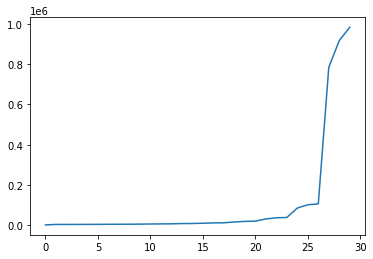

In [407]:
X2 = generate_data(5000,2)
X2 = np.array(X2)
XT2 = X2.T
#Multiply array by its transpose
XMult = np.matmul(XT2,X2)
#Find the eigenvalues and eigenvectors
eigenvalue, eigenvector = eig(XMult)
#Sort the eigenvalues
eigenvalue.sort()
print(eigenvalue)
plt.plot(eigenvalue)

0.0
[-1.55667262e-026 -8.96189471e-059 -1.85924562e-122 -3.68723175e-186
 -5.66090879e-248 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000  1.95966654e-309
  1.46330320e-013  1.48121559e+005]
0.1
[1.08167423e+01 1.21499421e+01 1.27151934e+01 1.28475840e+01
 1.32543073e+01 1.35416294e+01 1.45183403e+01 1.54954894e+01
 1.58280433e+01 1.68917581e+01 1.83087970e+01 1.92877480e+01
 2.10638856e+01 2.33797001e+01 2.47399765e+01 2.89592174e+01
 3.22736531e+01 3.62636891e+01 4.43407909e+01 4.84480636e+01
 5.84448984e+01 8.09584027e+01 9.35803723e+01 1.29474126e+02
 2.12052477e+02 2.43394992e+02 5.27448341e+02 1.95256888e+03
 2.29913974e+03 1.48421142e+05]
0.2
[4.4259161

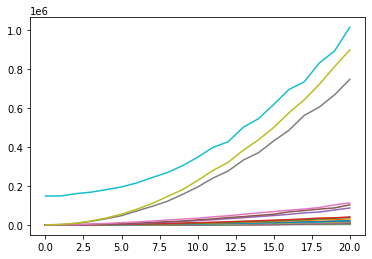

In [391]:
sds = []
#Perform all the above actions, but for each sd from 0.1 to 2.0
for sd in range(21):
    X2 = generate_data(5000,sd*0.1)
    X2 = np.array(X2)
    XT2 = X2.T
    XMult = np.matmul(XT2,X2)
    eigenvalue, eigenvector = eig(XMult)
    eigenvalue.sort()
    print(sd/10)
    print(eigenvalue)
    sds.append(eigenvalue)
plt.plot(sds)

## Problem 3

In [441]:
from sklearn.linear_model import LinearRegression

In [419]:
X3 = generate_data(5000,0.1)
X3 = pd.DataFrame(X3)

In [436]:
XLin = X3.drop(0, axis=1)
YLin = X3[0]

In [442]:
reg = LinearRegression().fit(XLin, YLin)
reg.score(XLin, YLin)

0.9965487325457367

In [443]:
reg.coef_

array([ 0.33152209,  0.33531342,  0.33982233, -0.00689733,  0.00657052,
       -0.01677911,  0.00117677, -0.00647016,  0.00751288,  0.01171751,
        0.00574835,  0.01136822, -0.014852  , -0.01995157, -0.00573599,
        0.01374389,  0.00537071,  0.00518473,  0.00239303,  0.01469011,
       -0.01876004, -0.01996264, -0.00425724,  0.01038277, -0.00157844,
       -0.00939225,  0.00332383,  0.00866875,  0.00649951])

In [474]:
X3 = generate_data(5000,0.00001)
X3 = pd.DataFrame(X3)

for i in range(30):
    XLin = X3.drop(i, axis=1)
    YLin = X3[i]
    reg = LinearRegression().fit(XLin, YLin)
    print("X",i+1)
    print(reg.coef_)
    print((np.argpartition(abs(reg.coef_), -5)[-5:]))

X 1
[ 0.32879318  0.33008345  0.3139173   0.00883623  0.00497239  0.02151569
  0.00965023 -0.01413641 -0.00326396 -0.0076672   0.00480829  0.00281813
  0.00473277  0.0167064   0.00063004 -0.02559825  0.00059334 -0.01623938
  0.01354907 -0.00634986  0.00529571  0.01234348 -0.00093922  0.02122684
 -0.02043497 -0.00286185 -0.01623485  0.01097343  0.0022799 ]
[ 5 15  2  0  1]
X 2
[ 0.49133292  0.02341162  0.01339408  0.4970211  -0.01789189 -0.03315783
 -0.01315988  0.0098121   0.01903706 -0.0051558  -0.01313185  0.00694959
  0.02896611 -0.01066791  0.00153143  0.00731725  0.02911409 -0.00274505
 -0.0279795  -0.0033606  -0.02003758  0.01452386 -0.02085497  0.00990627
  0.01238281  0.00883724  0.01083694 -0.0147016  -0.00153   ]
[12 16  5  3  0]
X 3
[ 0.49941248  0.02370358 -0.00818989 -0.0253415   0.50330461  0.00939137
 -0.00790236 -0.00086472 -0.0089714   0.01819226 -0.00965678 -0.00626865
 -0.02364182  0.00523165  0.00369166  0.02068341  0.00123965  0.02187144
  0.00873072 -0.0152825  -0

In [5]:
X

array([[ 1.23409972,  1.23029326,  1.22199158, ...,  1.18024686,
         1.54969707,  1.62359147],
       [-0.467776  , -0.50525444, -0.60695301, ..., -0.36739455,
        -0.65688923, -0.48817288],
       [-0.68048698, -0.58645548, -0.76480413, ..., -0.48795969,
        -0.61827851, -0.60924573],
       ...,
       [ 0.77154244,  0.74525615,  0.7160405 , ...,  0.4469129 ,
         0.96852396,  0.21998185],
       [-0.41674494, -0.38554998, -0.28755757, ...,  0.1250163 ,
        -0.89130717,  0.20324399],
       [-0.64988184, -0.65027553, -0.76700104, ..., -0.68787436,
        -0.48591935, -0.68695763]])